In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
import japanize_matplotlib
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
# データの読み込み
df = pd.read_csv("choco_ice.csv", encoding="sjis")
df

,日最高気温の平均(℃),year,month,チョコレート【円/日】,アイスクリーム・シャーベット【円/日】,feb
0,17.0,2009,11,12.166667,13.400000,0
1,12.4,2009,12,15.032258,14.193548,0
2,11.0,2010,1,14.709677,11.677419,0
3,9.9,2010,2,40.071429,10.892857,1
4,13.2,2010,3,13.193548,12.354839,0
...,...,...,...,...,...,...
109,12.1,2018,12,22.645161,17.322581,0
110,10.3,2019,1,25.451613,15.935484,0
111,11.6,2019,2,49.428571,15.107143,1
112,15.4,2019,3,22.935484,17.483871,0


In [3]:
#  コード5.1：線形単回帰
x_name = '日最高気温の平均(℃)'
y_name = 'アイスクリーム・シャーベット【円/日】'

x = df[x_name].values
y = df[y_name].values
a, b = np.polyfit(x, y, deg=1)
r2 = r2_score(y, a*x + b)

print(f"y = {a:.4f}x + {b:.4f}")
print(f"R^2: {r2:.4f}")

y = 1.2583x + -3.0113
R^2: 0.8137


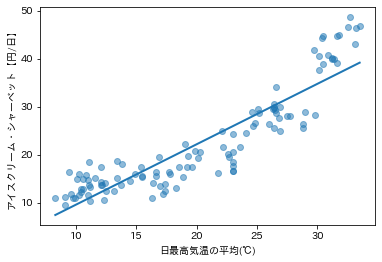

In [4]:
# 図5.2：アイスクリームの回帰直線
plt.scatter(x, y, alpha=0.5)
x_minmax = np.array([x.min(), x.max()])
y_pred = a * x_minmax + b
plt.plot(x_minmax, y_pred, linewidth=2)
plt.xlabel(x_name)
plt.ylabel(y_name)
plt.show()

In [5]:
# コード5.2：次数2の単回帰
x_name = '日最高気温の平均(℃)'
y_name = 'アイスクリーム・シャーベット【円/日】'

x = df[x_name].values
y = df[y_name].values
a2, a1, b = np.polyfit(x, y, deg=2)
r2 = r2_score(y, a2 * x**2 + a1 * x + b)

print(f"y = {a2:.4f}x^2 + {a1:.4f}x + {b:.4f}")
print(f"R^2: {r2:.4f}")

y = 0.0733x^2 + -1.7640x + 23.9639
R^2: 0.9185


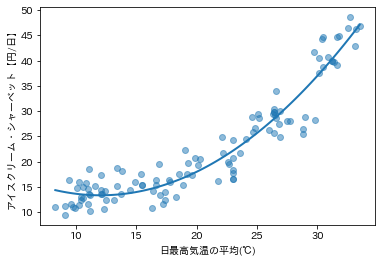

In [6]:
# 図5.3：アイスクリームの回帰曲線
plt.scatter(x, y, alpha=0.5)
x_minmax = np.linspace(x.min(), x.max(), 100)
y_pred = a2 * x_minmax**2 + a1 * x_minmax + b
plt.plot(x_minmax, y_pred, linewidth=2)
plt.xlabel(x_name)
plt.ylabel(y_name)
plt.show()

In [7]:
# コード5.3：説明変数が2つの場合の重回帰
from sklearn.linear_model import LinearRegression

x = df[['日最高気温の平均(℃)', 'feb']].values
y = df['チョコレート【円/日】'].values

lr = LinearRegression()
lr.fit(x, y)
a1, a2 = lr.coef_
b = lr.intercept_
r2 = r2_score(y, a1 * x[:,0] + b + a2 * x[:,1])

print(f"y = {a:.4f}x + {b:.4f}v + {a2:.4f}")
print(f"R^2: {r2:.4f}")

y = 1.2583x + 24.0910v + 26.9451
R^2: 0.9249


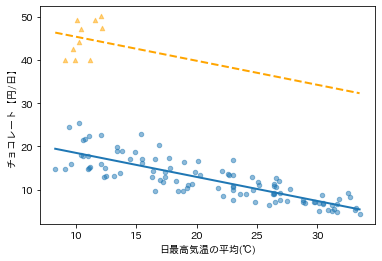

In [8]:
# 図5.4：ダミー変数を導入したチョコレートの回帰直線
x_minmax = np.array([x[:,0].min(), x[:,0].max()])
y_pred = a1 * x_minmax + b
x_name = "日最高気温の平均(℃)"
y_name = "チョコレート【円/日】"
ax = df[df.feb==0].plot(kind='scatter', x=x_name, y=y_name, alpha=0.5)
df[df.feb==1].plot(kind='scatter', x=x_name, y=y_name, marker='^', ax=ax, alpha=0.5, color="orange")
plt.plot(x_minmax, y_pred, linewidth=2)
plt.plot(x_minmax, y_pred + a2, linewidth=2, linestyle="dashed", color="orange")
plt.show()